
# Project : Comprehensive Regression Analysis
### Introduction to Machine Learning

This notebook is designed to guide you through a comprehensive regression analysis using various techniques. You will explore different methods, implement regularization techniques, and evaluate the performance of your models using various metrics and computational time.





### Team Name: TEAM ASPIRERS
### Name of Member 1: PARTHA METE
### Name of Member 2: SUDAM KUMAR PAUL

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import time
# Add all other libraries you would require
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import add_dummy_feature
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
import seaborn as sns


## 1. Load the Dataset
**Instruction:** Load the chosen dataset and display its basic information and statistics. You may use any well-known dataset.

In [2]:

# Loading a particular dataset

drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cost_of_Living_Index_by_Country_2024.csv')

# Display the first few rows of the dataset
df.head(10)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5
5,6,Norway,76.0,26.2,52.1,79.0,73.5,114.7
6,7,Denmark,72.3,26.4,50.2,64.8,81.3,127.2
7,8,Hong Kong (China),70.8,59.4,65.3,84.6,46.2,109.3
8,9,United States,70.4,41.7,56.6,75.0,67.2,142.3
9,10,Australia,70.2,33.4,52.5,77.3,62.5,127.4


In [3]:
# Display basic statistics
df.describe()

,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,61.000000,43.555372,16.052893,30.357851,44.228926,36.471074,65.094215
std,35.073732,16.147574,11.412267,13.263721,17.055109,18.258110,39.569094
min,1.000000,18.800000,2.400000,11.100000,17.500000,12.800000,2.300000
25%,31.000000,30.200000,8.500000,19.800000,31.600000,21.600000,34.800000
50%,61.000000,39.500000,12.400000,27.000000,40.500000,33.100000,50.600000
75%,91.000000,52.800000,20.100000,37.000000,53.700000,47.200000,99.400000
max,121.000000,101.100000,67.200000,74.900000,109.100000,97.000000,182.500000



## 2. Data Preprocessing
**Instruction:** Perform any necessary preprocessing steps, including handling missing values, encoding categorical variables, and scaling features if required.


In [4]:
# Checking for missing values

missing_values = df.isnull().sum()
print(missing_values)

# Split the dataset into features (X) and target (y)

X = df.drop(columns=['Cost of Living Index','Cost of Living Plus Rent Index','Rank','Country','Restaurant Price Index'])
y = df[['Cost of Living Index']]
print("\nDataFrame after dropping columns:")
print(X)
print("\nTarget column is:")
print(y)

# Split the data into training and test sets (e.g., 80% training, 20% testing)
#X_train, X_test, y_train, y_test =

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,train_size=0.8,random_state=42)
print("Training feature set shape:", X_train.shape)
print("Test feature set shape:", X_test.shape)
print("Training target set shape:", y_train.shape)
print("Test target set shape:", y_test.shape)

Rank                              0
Country                           0
Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
dtype: int64

DataFrame after dropping columns:
     Rent Index  Groceries Index  Local Purchasing Power Index
0          46.5            109.1                         158.7
1          36.7             81.6                          54.6
2          39.2             88.4                         120.3
3          67.2             74.6                         111.1
4          19.0             80.8                          43.5
..          ...              ...                           ...
116         2.4             25.7                          33.1
117         5.6             23.8                          82.6
118         3.7             21.2                          20.0
119         4.3             22.2  

##Histogram of Dataframe



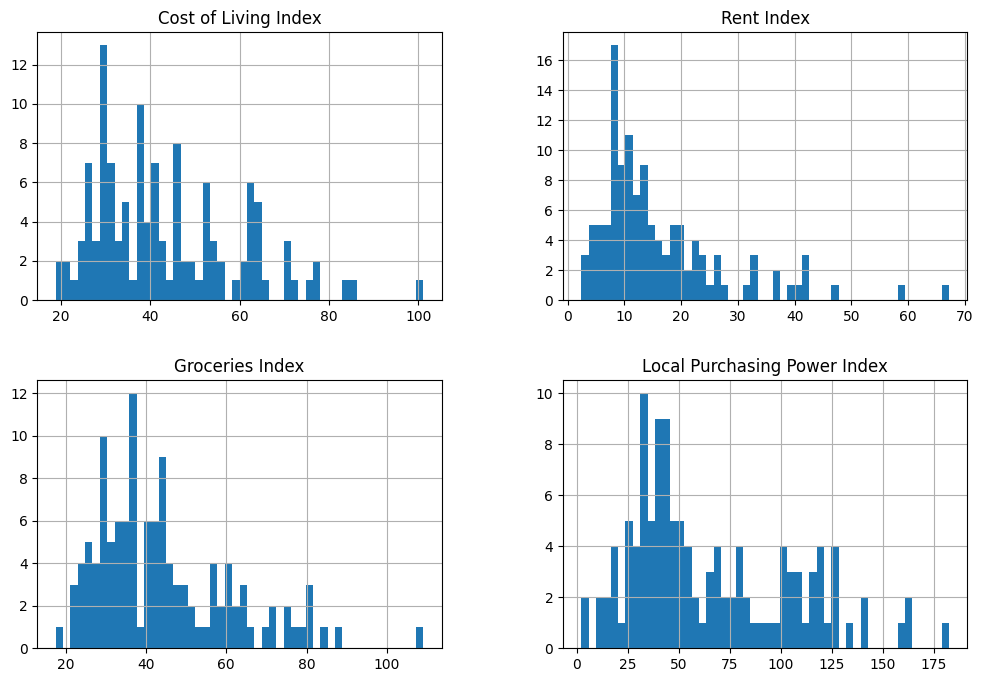

In [5]:
A = df.drop(columns=['Cost of Living Plus Rent Index','Rank','Country','Restaurant Price Index'])
A.hist(bins = 50,figsize=(12,8))
plt.show()

##Array for comparison

In [6]:
MSE_arr=[]
MAE_arr=[]
R2_arr=[]
time_taken_arr=[]


## 3. Simple Linear Regression
**Instruction:** Implement a simple linear regression model using scikit-learn.


In [7]:
# Define the linear regression model

model = LinearRegression()

#------------------------------------------------------------------------------
# Fit the model on the training data

model.fit(X_train, y_train)

#-----------------------------------------------------------------------------
# Predict on the test data

start_time = time.time()
y_pred_train= model.predict(X_train)
y_pred_test = model.predict(X_test)
end_time = time.time()
time_taken= end_time-start_time
print(f"Time taken for predictions: {time_taken:6f} seconds")

#-------------------------------------------------------------------------
# Calculate performance metrics [MSE, MAE, R^2]

mse_0_Lin_ = mean_squared_error(y_train, y_pred_train)
mae_0_Lin = mean_absolute_error(y_train, y_pred_train)
r2_0_Lin = r2_score(y_train, y_pred_train)

mse_1_Lin = mean_squared_error(y_test, y_pred_test)
mae_1_Lin = mean_absolute_error(y_test, y_pred_test)
r2_1_Lin = r2_score(y_test, y_pred_test)

#-----------------------------------------------------------------------
# Print the metrics

print('mean squared error about train value is:',mse_0_Lin_)
print('mean absolute error about train value is',mae_0_Lin)
print('R_Squared score about train value is',r2_0_Lin)
print('mean squared error about test value is:',mse_1_Lin)
print('mean absolute error about test value is',mae_1_Lin)
print('R_Squared score about test value is',r2_1_Lin)

MSE_arr.append(mse_1_Lin)
MAE_arr.append(mae_1_Lin)
R2_arr.append(r2_1_Lin)
time_taken_arr.append(time_taken)


Time taken for predictions: 0.001821 seconds
mean squared error about train value is: 17.489002512269174
mean absolute error about train value is 3.0691669052454813
R_Squared score about train value is 0.928123209700007
mean squared error about test value is: 10.518571072112447
mean absolute error about test value is 2.5164046907303073
R_Squared score about test value is 0.9658854192165944



## 4. Polynomial Regression
**Instruction:** Implement polynomial regression for degrees 2, 3, and 4.


##Polynomial Regression of Degree 2

In [8]:

# Define polynomial features of degree 2
poly_features = PolynomialFeatures(degree=2)
# Split the transformed data into training and test sets
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Fit the linear model on polynomial features
model.fit(X_train_poly, y_train)

# Predict and evaluate performance
start_time = time.time()
y1_pred_poly = model.predict(X_train_poly)
y2_pred_poly = model.predict(X_test_poly)
end_time = time.time()
time_taken= end_time-start_time
print(f"Time taken for predictions: {time_taken:6f} seconds")

mse_0_poly2 = mean_squared_error(y_train, y1_pred_poly)
mae_0_poly2 = mean_absolute_error(y_train, y1_pred_poly)
r2_0_poly2 = r2_score(y_train, y1_pred_poly)
mse_1_poly2 = mean_squared_error(y_test, y2_pred_poly)
mae_1_poly2 = mean_absolute_error(y_test, y2_pred_poly)
r2_1_poly2 = r2_score(y_test, y2_pred_poly)

# Calculate performance metrics for polynomial regression
print("Mean Squared Error (Polynomial Regression) for degree 2 for training values:", mse_0_poly2)
print("Mean Absolute Error (Polynomial Regression) for degree 2 for training values:", mae_0_poly2)
print("R^2 Score (Polynomial Regression) for degree 2 for training values:", r2_0_poly2)
print("\n")
print("Mean Squared Error (Polynomial Regression) for degree 2 for test values:", mse_1_poly2)
print("Mean Absolute Error (Polynomial Regression) for degree 2 for test values:", mae_1_poly2)
print("R^2 Score (Polynomial Regression) for degree 2 for test values:", r2_1_poly2)

# Print the metrics for polynomial regression
print('\n')
print(model.coef_)
print('\n')
print(model.intercept_)

MAE_arr.append(mae_1_poly2)
MSE_arr.append(mse_1_poly2)
R2_arr.append(r2_1_poly2)
time_taken_arr.append(time_taken)

Time taken for predictions: 0.000437 seconds
Mean Squared Error (Polynomial Regression) for degree 2 for training values: 13.20989059335488
Mean Absolute Error (Polynomial Regression) for degree 2 for training values: 2.650644682335382
R^2 Score (Polynomial Regression) for degree 2 for training values: 0.9457096232104534


Mean Squared Error (Polynomial Regression) for degree 2 for test values: 17.343174183952748
Mean Absolute Error (Polynomial Regression) for degree 2 for test values: 3.199737228655854
R^2 Score (Polynomial Regression) for degree 2 for test values: 0.9437513790910471


[[ 0.00000000e+00  4.76260570e-01  9.61949978e-01  1.12455029e-01
  -1.32487619e-02  1.07837702e-02 -3.03510173e-04 -4.50248135e-03
  -7.12243555e-04 -3.19871323e-04]]


[-3.63885855]


##Polynomial Regression of Degree 3

In [9]:
# Define polynomial features of degree 3
poly_features = PolynomialFeatures(degree=3)
# Split the transformed data into training and test sets
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Fit the linear model on polynomial features
model.fit(X_train_poly, y_train)

# Predict and evaluate performance
start_time = time.time()
y1_pred_poly = model.predict(X_train_poly)
y2_pred_poly = model.predict(X_test_poly)
end_time = time.time()
time_taken= end_time-start_time
print(f"Time taken for predictions: {time_taken:6f} seconds")

mse_0_poly3 = mean_squared_error(y_train, y1_pred_poly)
mae_0_poly3 = mean_absolute_error(y_train, y1_pred_poly)
r2_0_poly3= r2_score(y_train, y1_pred_poly)
mse_1_poly3 = mean_squared_error(y_test, y2_pred_poly)
mae_1_poly3 = mean_absolute_error(y_test, y2_pred_poly)
r2_1_poly3 = r2_score(y_test, y2_pred_poly)

# Calculate performance metrics for polynomial regression
print("Mean Squared Error (Polynomial Regression) for degree 3 for training values:", mse_0_poly3)
print("Mean Absolute Error (Polynomial Regression) for degree 3 for training values:", mae_0_poly3)
print("R^2 Score (Polynomial Regression) for degree 3 for training values:", r2_0_poly3)
print("\n")
print("Mean Squared Error (Polynomial Regression) for degree 3 for test values:", mse_1_poly3)
print("Mean Absolute Error (Polynomial Regression) for degree 3 for test values:", mae_1_poly3)
print("R^2 Score (Polynomial Regression) for degree 3 for test values:", r2_1_poly3)

# Print the metrics for polynomial regression
print('\n')
print(model.coef_)
print('\n')
print(model.intercept_)

MAE_arr.append(mae_1_poly3)
MSE_arr.append(mse_1_poly3)
R2_arr.append(r2_1_poly3)
time_taken_arr.append(time_taken)


Time taken for predictions: 0.000416 seconds
Mean Squared Error (Polynomial Regression) for degree 3 for training values: 8.837306293652412
Mean Absolute Error (Polynomial Regression) for degree 3 for training values: 2.124895556234867
R^2 Score (Polynomial Regression) for degree 3 for training values: 0.9636801921184441


Mean Squared Error (Polynomial Regression) for degree 3 for test values: 35.35186745631796
Mean Absolute Error (Polynomial Regression) for degree 3 for test values: 3.3993855516073386
R^2 Score (Polynomial Regression) for degree 3 for test values: 0.8853442991529263


[[ 0.00000000e+00  1.63588306e-01  9.37383049e-01 -4.12933328e-01
  -6.81749115e-03  1.26434528e-02  3.36624160e-04 -1.99206178e-02
   2.14172310e-02 -3.85311162e-05  1.06418262e-03 -1.76275339e-03
  -1.81342470e-05  6.35120487e-04  1.79245512e-04 -2.80862275e-05
   1.34604008e-04 -2.29520247e-04 -2.49851294e-05  4.67206175e-06]]


[9.09844436]


##Polynomial Regression of Degree 4

In [10]:
# Define polynomial features of degree 4
poly_features = PolynomialFeatures(degree=4)
# Split the transformed data into training and test sets
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Fit the linear model on polynomial features
model.fit(X_train_poly, y_train)

# Predict and evaluate performance
start_time = time.time()
y1_pred_poly = model.predict(X_train_poly)
y2_pred_poly = model.predict(X_test_poly)
end_time = time.time()
time_taken= end_time-start_time
print(f"Time taken for predictions: {time_taken:6f} seconds")

mse_0_poly4 = mean_squared_error(y_train, y1_pred_poly)
mae_0_poly4 = mean_absolute_error(y_train, y1_pred_poly)
r2_0_poly4= r2_score(y_train, y1_pred_poly)
mse_1_poly4 = mean_squared_error(y_test, y2_pred_poly)
mae_1_poly4 = mean_absolute_error(y_test, y2_pred_poly)
r2_1_poly4 = r2_score(y_test, y2_pred_poly)

# Calculate performance metrics for polynomial regression
print("Mean Squared Error (Polynomial Regression) for degree 4 for training values:", mse_0_poly4)
print("Mean Absolute Error (Polynomial Regression) for degree 4 for training values:", mae_0_poly4)
print("R^2 Score (Polynomial Regression) for degree 4 for training values:", r2_0_poly4)
print("\n")
print("Mean Squared Error (Polynomial Regression) for degree 4 for test values:", mse_1_poly4)
print("Mean Absolute Error (Polynomial Regression) for degree 4 for test values:", mae_1_poly4)
print("R^2 Score (Polynomial Regression) for degree 4 for test values:", r2_1_poly4)

# Print the metrics for polynomial regression
print('\n')
print(model.coef_)
print('\n')
print(model.intercept_)

# MAE_arr.append(mae_1_poly4)
# MSE_arr.append(mse_1_poly4)
# R2_arr.append(r2_1_poly4)
time_taken_arr.append(time_taken)


Time taken for predictions: 0.000487 seconds
Mean Squared Error (Polynomial Regression) for degree 4 for training values: 6.603385705714525
Mean Absolute Error (Polynomial Regression) for degree 4 for training values: 1.9149708813748454
R^2 Score (Polynomial Regression) for degree 4 for training values: 0.9728612212556637


Mean Squared Error (Polynomial Regression) for degree 4 for test values: 596.3057779620659
Mean Absolute Error (Polynomial Regression) for degree 4 for test values: 11.060320223303417
R^2 Score (Polynomial Regression) for degree 4 for test values: -0.9339814785139819


[[ 4.72967197e-07  4.63031895e+00 -4.53975879e+00  9.40065894e-02
   8.12309968e-02 -2.52098619e-01 -2.28409527e-02  2.54033978e-01
  -4.78640118e-02  1.21122584e-02 -8.72494095e-03  4.02138003e-03
   3.04818625e-03  4.65390076e-03 -2.46127838e-03  3.85826862e-07
  -5.40986162e-03  2.34146521e-03 -1.72926355e-04 -8.27038221e-05
  -1.35063574e-04  8.56939686e-05  2.24292059e-04 -2.63493682e-05
  -1.011


## 5. Gradient Descent Methods
 Implementation of batch, stochastic, and mini-batch gradient descent for linear regression.


##Batch Gradient Descent

In [11]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a bias term (intercept) to both training and test sets
X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

# Define a function to compute the cost (Mean Squared Error)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

# Batch Gradient Descent function
def batch_gradient_descent(X, y, theta, learning_rate=0.01, iterations=1000):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        # Calculate the gradient
        gradient = (1/m) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradient

        # Save the cost for the current iteration
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

# Reshape y_train and y_test to ensure they are column vectors
if y_train.ndim == 1:
  y_train = y_train.values.reshape(-1, 1)
if y_test.ndim == 1:
  y_test = y_test.values.reshape(-1, 1)

# Initialize parameters
theta = np.random.randn(X_train_scaled.shape[1], 1)  # Theta initialized as a column vector
learning_rate = 0.01
iterations = 1000

# Apply Batch Gradient Descent
start_time = time.time()
theta_batch, cost_history_batch = batch_gradient_descent(X_train_scaled, y_train, theta.copy(), learning_rate, iterations)
end_time = time.time()
time_taken= end_time-start_time
print(f"Time taken for predictions: {time_taken:6f} seconds")


print("Optimized Theta:", theta)
# Compute cost on the training set
train_cost = compute_cost(X_train_scaled, y_train, theta_batch)
print("Training Cost:", train_cost)

# Compute cost on the test set
training_predictions = X_train_scaled.dot(theta_batch)
test_cost = compute_cost(X_train_scaled, y_train, theta_batch)
test_predictions = X_test_scaled.dot(theta_batch)
test_cost = compute_cost(X_test_scaled, y_test, theta_batch)
print("Test Predictions:", test_predictions)
print("Test Cost:", test_cost)

mse_0_bg = mean_squared_error(y_train, training_predictions)
mae_0_bg = mean_absolute_error(y_train, training_predictions)
r2_0_bg = r2_score(y_train, training_predictions)

mse_1_bg = mean_squared_error(y_test, test_predictions)
mae_1_bg = mean_absolute_error(y_test, test_predictions)
r2_1_bg = r2_score(y_test, test_predictions)

print('Mean squared error for training is:', mse_0_bg)
print('Mean absolute error for training is', mae_0_bg)
print('R_Squared score for training value is', r2_0_bg)
print('\n')
print('Mean squared error for test value is:', mse_1_bg)
print('Mean absolute error for test value is', mae_1_bg)
print('R_Squared score for test value is', r2_1_bg)

MAE_arr.append(mae_1_bg)
MSE_arr.append(mse_1_bg)
R2_arr.append(r2_1_bg)
#time_taken_arr.append(time_taken)



/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
<ipython-input-11-25f8b00cfca5>:28: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  cost_history[i] = compute_cost(X, y, theta)


Time taken for predictions: 0.691799 seconds
Optimized Theta: [[ 1.13557709]
 [-0.06131908]
 [-1.37936011]
 [ 0.32520424]]
Training Cost: Cost of Living Index    8.842891
dtype: float64
Test Predictions: [[46.23479756]
 [43.36754245]
 [67.64885384]
 [37.81561438]
 [54.26176509]
 [34.96332378]
 [38.2680397 ]
 [61.71106135]
 [43.68542369]
 [30.23884962]
 [58.38123132]
 [39.27418103]
 [68.08850479]
 [53.30472826]
 [29.91663028]
 [22.38426626]
 [27.19803954]
 [99.71278835]
 [32.6766292 ]
 [28.16414149]
 [37.82039498]
 [51.24528784]
 [48.93133674]
 [39.15174677]
 [38.48869749]]
Test Cost: Cost of Living Index    6.091289
dtype: float64
Mean squared error for training is: 17.685782949970527
Mean absolute error for training is 3.1180315443283377
R_Squared score for training value is 0.9273144759688591


Mean squared error for test value is: 12.182577841377855
Mean absolute error for test value is 2.69419812776143
R_Squared score for test value is 0.9604885936435141


##Mini-Batch Gradient Descent

In [12]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a bias term (intercept) to X_train_scaled
X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

# Define a function to compute the cost (Mean Squared Error)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

# Mini-Batch Gradient Descent function
def mini_batch_gradient_descent(X, y, theta, learning_rate=0.01, iterations=1000, batch_size=20):
    m,n = X.shape
    cost_history = np.zeros(iterations)

    if isinstance(X, pd.DataFrame):
        X = X.values  # Convert to NumPy array
    if isinstance(y, pd.DataFrame):
        y = y.values  # Convert to NumPy array
    for i in range(iterations):


        # Shuffle the data
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices].reshape(-1,1)

        for j in range(0, m, batch_size):
            X_batch = X_shuffled[j:j+batch_size]
            y_batch = y_shuffled[j:j+batch_size]

            # Calculate the gradient
            gradient = (1/batch_size) * X_batch.T.dot(X_batch.dot(theta) - y_batch)
            theta -= learning_rate * gradient

        # Save the cost for the current iteration
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

# Initialize parameters
theta = np.random.randn(X_train_scaled.shape[1],1)
learning_rate = 0.01
iterations = 1000
batch_size = 20

# Apply Mini-Batch Gradient Descent
start_time = time.time()
theta_mini_batch, cost_history_mini_batch = mini_batch_gradient_descent(X_train_scaled, y_train, theta.copy(), learning_rate, iterations, batch_size)

end_time = time.time()
time_taken= end_time-start_time
print(f"Time taken for predictions: {time_taken:6f} seconds")

test_predictions = X_test_scaled.dot(theta_mini_batch)
train_predictions = X_train_scaled.dot(theta_mini_batch)

# Output the final theta values
print("Theta from Mini-Batch Gradient Descent:", theta_mini_batch)
mse_0_mb = mean_squared_error(y_train, train_predictions)
mae_0_mb = mean_absolute_error(y_train, train_predictions)
r2_0_mb = r2_score(y_train, train_predictions)

mse_1_mb = mean_squared_error(y_test, test_predictions)
mae_1_mb = mean_absolute_error(y_test, test_predictions)
r2_1_mb = r2_score(y_test, test_predictions)

print('Mean squared error for train values is:', mse_0_mb)
print('Mean absolute error for train value is', mae_0_mb)
print('R_Squared score is for train value', r2_0_mb)
print('\n')
print('Mean squared error for test values is:', mse_1_mb)
print('Mean absolute error for test value is', mae_1_mb)
print('R_Squared score is for test value', r2_1_mb)

MAE_arr.append(mae_1_mb)
MSE_arr.append(mse_1_mb)
R2_arr.append(r2_1_mb)
#time_taken_arr.append(time_taken)


Time taken for predictions: 0.043218 seconds
Theta from Mini-Batch Gradient Descent: [[42.86345522]
 [ 2.70984823]
 [11.67398378]
 [ 1.52800785]]
Mean squared error for train values is: 17.489012242714825
Mean absolute error for train value is 3.0695420813985894
R_Squared score is for train value 0.92812316970955


Mean squared error for test values is: 10.521007301770696
Mean absolute error for test value is 2.5170225661204806
R_Squared score is for test value 0.9658775178626069


##Stochastic Gradient Descent

In [13]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a bias term (intercept)
X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

# Define a function to compute the cost (Mean Squared Error)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m)) * np.sum(np.square(predictions - y))
    return cost

# Stochastic Gradient Descent function

def stochastic_gradient_descent(X, y, theta, learning_rate=0.01, iterations=1000):
    m = len(y)
    cost_history = np.zeros(iterations)

    if isinstance(X, pd.DataFrame):
        X = X.values  # Convert to NumPy array
    if isinstance(y, pd.DataFrame):
        y = y.values  # Convert to NumPy array

    for i in range(iterations):
        cost = 0.0
        for j in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind,:].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, theta)

            gradient = X_i.T.dot(prediction - y_i)
            theta = theta - (learning_rate * gradient)

            cost += compute_cost(X_i, y_i, theta)
        cost_history[i] = cost

    return theta, cost_history

# Reshape y_train to ensure it is a column vector
if y_train.ndim == 1:
  y_train = y_train.values.reshape(-1, 1)

# Initialize parameters
theta = np.random.randn(X_train_scaled.shape[1], 1)
learning_rate = 0.01
iterations = 1000

# Apply Stochastic Gradient Descent
start_time = time.time()
theta_stochastic, cost_history_stochastic = stochastic_gradient_descent(X_train_scaled, y_train, theta.copy(), learning_rate, iterations)

end_time = time.time()
time_taken= end_time-start_time
print(f"Time taken for predictions: {time_taken:6f} seconds")

# Make predictions on the test set
test_predictions = X_test_scaled.dot(theta_stochastic)
train_predictions = X_train_scaled.dot(theta_stochastic)

# Calculate performance metrics
mse_0_stg = mean_squared_error(y_train, train_predictions)
mae_0_stg = mean_absolute_error(y_train, train_predictions)
r2_0_stg = r2_score(y_train, train_predictions)
mse_1_stg = mean_squared_error(y_test, test_predictions)
mae_1_stg = mean_absolute_error(y_test, test_predictions)
r2_1_stg = r2_score(y_test, test_predictions)
print('Mean squared error for train value is:', mse_0_stg)
print('Mean absolute error for train value is', mae_0_stg)
print('R_Squared score for train value is', r2_0_stg)
print('\n')
print('Mean squared error for test value is:', mse_1_stg)
print('Mean absolute error for test value is', mae_1_stg)
print('R_Squared score for test value is', r2_1_stg)

# Output the final theta values
print("Theta from Stochastic Gradient Descent:", theta_stochastic)

MAE_arr.append(mae_1_stg)
MSE_arr.append(mse_1_stg)
R2_arr.append(r2_1_stg)
#time_taken_arr.append(time_taken)

Time taken for predictions: 1.367538 seconds
Mean squared error for train value is: 17.654515908910046
Mean absolute error for train value is 3.0775591670522107
R_Squared score for train value is 0.9274429781262594


Mean squared error for test value is: 10.187466821045014
Mean absolute error for test value is 2.4577432728797395
R_Squared score for test value is 0.9669592801662737
Theta from Stochastic Gradient Descent: [[43.17008667]
 [ 2.27281522]
 [11.87873298]
 [ 1.70185446]]



## 6. Regularization Techniques (Ridge,  Lasso, Elastic Net Regression and Early Stopping)
Implementation of Ridge, Lasso regression, Elastic Net Regression, and Early Stopping using scikit-learn.


##Ridge Regression

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Ridge Regression

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train1, y_train1)
start_time = time.time()
y1_pred_ridge = ridge_model.predict(X_train1)
y2_pred_ridge = ridge_model.predict(X_test1)
end_time = time.time()
time_taken= end_time-start_time
print(f"Time taken for predictions: {time_taken:6f} seconds")

print('predictions for ridge regression is:',y2_pred_ridge)

# Calculate performance metrics

# Mean Absolute Error (MAE)
mae_0_ri = mean_absolute_error(y_train1,y1_pred_ridge)
mae_1_ri = mean_absolute_error(y_test1,y2_pred_ridge)

# Mean Squared Error (MSE)
mse_0_ri = mean_squared_error(y_train1,y1_pred_ridge)
mse_1_ri = mean_squared_error(y_test1,y2_pred_ridge)

# R-squared (R²)
r2_0_ri = r2_score(y_train1,y1_pred_ridge)
r2_1_ri = r2_score(y_test1,y2_pred_ridge)

# performance matrices

print("Mean Absolute Error (MAE) for train values:", mse_0_ri)
print("Mean Squared Error (MSE) for train values:", mae_0_ri)
print("R-squared (R²) for train values:", r2_0_ri)

print("Mean Absolute Error (MAE) for test values:", mse_1_ri)
print("Mean Squared Error (MSE) for test values:", mae_1_ri)
print("R-squared (R²) for test values:", r2_1_ri)

MAE_arr.append(mae_1_ri)
MSE_arr.append(mse_1_ri)
R2_arr.append(r2_1_ri)

time_taken_arr.append(time_taken)

Time taken for predictions: 0.000392 seconds
predictions for ridge regression is: [ 46.24467772  43.36028652  68.54941042  38.08436588  53.21102721
  35.34632587  38.4654983   61.98547192  43.6963167   30.07570187
  58.30650065  39.44919711  68.07447868  52.35281288  29.91330027
  22.35862444  27.09443447 100.07251877  32.73657531  28.10938355
  37.89186978  51.50884733  49.39082742  39.47541999  38.75664849]
Mean Absolute Error (MAE) for train values: 17.522768760675863
Mean Squared Error (MSE) for train values: 3.0897819931913815
R-squared (R²) for train values: 0.9279844362305513
Mean Absolute Error (MAE) for test values: 11.195783140634637
Mean Squared Error (MSE) for test values: 2.6076570518720077
R-squared (R²) for test values: 0.9636890366793932


##Lasso Regression

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a Lasso Regression model

lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha (regularization strength)

# Fit the model
lasso_model.fit(X_train1, y_train1)
start_time = time.time()
y1_pred_lasso = lasso_model.predict(X_train1)
y2_pred_lasso = lasso_model.predict(X_test1)
end_time = time.time()
time_taken= end_time-start_time
print(f"Time taken for predictions: {time_taken:6f} seconds")

print('predictions for lasso regression is:',y2_pred_lasso)

# Calculate performance metrics

# Mean Absolute Error (MAE)
mae_0_la = mean_absolute_error(y_train1,y1_pred_lasso)
mae_1_la = mean_absolute_error(y_test1,y2_pred_lasso)

# Mean Squared Error (MSE)
mse_0_la = mean_squared_error(y_train1,y1_pred_lasso)
mse_1_la = mean_squared_error(y_test1,y2_pred_lasso)

# R-squared (R²)
r2_0_la = r2_score(y_train1,y1_pred_lasso)
r2_1_la = r2_score(y_test1,y2_pred_lasso)

# performance matrices

print("Mean Absolute Error (MAE) for train values:", mse_0_la)
print("Mean Squared Error (MSE) for train values:", mae_0_la)
print("R-squared (R²) for train values:", r2_0_la)

print("Mean Absolute Error (MAE) for test values:", mse_1_la)
print("Mean Squared Error (MSE) for test values:", mae_1_la)
print("R-squared (R²) for test values:", r2_1_la)

MAE_arr.append(mae_1_la)
MSE_arr.append(mse_1_la)
R2_arr.append(r2_1_la)
time_taken_arr.append(time_taken)

Time taken for predictions: 0.000413 seconds
predictions for lasso regression is: [46.44428993 42.33497228 68.59175644 38.75462119 51.0557998  36.6634432
 39.10440238 60.93223047 43.52025099 30.80162147 57.15447584 40.00467781
 66.53250655 49.83747952 30.80543847 23.77034198 27.98128214 96.81164984
 33.83915804 29.01951174 38.09097118 50.64386114 49.81294874 40.45325397
 40.02515706]
Mean Absolute Error (MAE) for train values: 18.81134544817226
Mean Squared Error (MSE) for train values: 3.382824177261387
R-squared (R²) for train values: 0.9226886078213746
Mean Absolute Error (MAE) for test values: 12.834685563421132
Mean Squared Error (MSE) for test values: 3.020583564146419
R-squared (R²) for test values: 0.9583736313153982


##Elastic Net Regression

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a elastic_net Regression model

elastic_net  = ElasticNet(alpha=1.0,l1_ratio=0.5)

# Fit the model
elastic_net.fit(X_train1, y_train1)
start_time = time.time()
y1_pred_elastic_net = elastic_net.predict(X_train1)
y2_pred_elastic_net = elastic_net.predict(X_test1)
end_time = time.time()
time_taken= end_time-start_time
print(f"Time taken for predictions: {time_taken:6f} seconds")

print('predictions for elastic_net regression is:',y2_pred_elastic_net)

# Calculate performance metrics

# Mean Absolute Error (MAE)
mae_0_en = mean_absolute_error(y_train1,y1_pred_elastic_net)
mae_1_en = mean_absolute_error(y_test1,y2_pred_elastic_net)

# Mean Squared Error (MSE)
mse_0_en = mean_squared_error(y_train1,y1_pred_elastic_net)
mse_1_en = mean_squared_error(y_test1,y2_pred_elastic_net)

# R-squared (R²)
r2_0_en = r2_score(y_train1,y1_pred_elastic_net)
r2_1_en = r2_score(y_test1,y2_pred_elastic_net)

# performance matrices

print("Mean Absolute Error (MAE) for train values:", mse_0_en)
print("Mean Squared Error (MSE) for train values:", mae_0_en)
print("R-squared (R²) for train values:", r2_0_en)

print("Mean Absolute Error (MAE) for test values:", mse_1_en)
print("Mean Squared Error (MSE) for test values:", mae_1_en)
print("R-squared (R²) for test values:", r2_1_en)

MAE_arr.append(mae_1_en)
MSE_arr.append(mse_1_en)
R2_arr.append(r2_1_en)
time_taken_arr.append(time_taken)

Time taken for predictions: 0.000469 seconds
predictions for elastic_net regression is: [44.56224965 45.28430347 56.52301537 37.78131039 56.56867471 34.43888528
 38.27554607 56.29873107 43.72074884 33.78842683 55.12079997 39.12375683
 61.8931285  56.49646585 32.92060768 27.17374262 31.42726847 84.50723371
 34.09874749 31.8873924  39.14608589 49.35732334 44.88468759 37.88377743
 36.99011968]
Mean Absolute Error (MAE) for train values: 33.61883459560382
Mean Squared Error (MSE) for train values: 4.707801086519461
R-squared (R²) for train values: 0.8618323759366399
Mean Absolute Error (MAE) for test values: 48.790820767553726
Mean Squared Error (MSE) for test values: 5.097704082863736
R-squared (R²) for test values: 0.8417581261606575


##Early Stopping

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a SGDRegressor with early stopping

sgd_regressor = SGDRegressor(penalty='l2', alpha=0.1, early_stopping=True, n_iter_no_change=5, max_iter=2000, tol=1e-4,random_state=42)
sgd_regressor.fit(X_train1, y_train1)
start_time = time.time()
y1_pred_sgd = sgd_regressor.predict(X_train1)
y2_pred_sgd = sgd_regressor.predict(X_test1)
end_time = time.time()
time_taken= end_time-start_time
print(f"Time taken for predictions: {time_taken:6f} seconds")

# Calculate performance metrics

# Mean Absolute Error (MAE)
mae_0_es = mean_absolute_error(y_train1,y1_pred_sgd)
mae_1_es = mean_absolute_error(y_test1,y2_pred_sgd)

# Mean Squared Error (MSE)
mse_0_es = mean_squared_error(y_train1,y1_pred_sgd)
mse_1_es = mean_squared_error(y_test1,y2_pred_sgd)

# R-squared (R²)
r2_0_es = r2_score(y_train1,y1_pred_sgd)
r2_1_es = r2_score(y_test1,y2_pred_sgd)

# performance matrices

print("Mean Absolute Error (MAE) for train values:", mse_0_es)
print("Mean Squared Error (MSE) for train values:", mae_0_es)
print("R-squared (R²) for train values:", r2_0_es)
print('\n')
print("Mean Absolute Error (MAE) for test values:", mse_1_es)
print("Mean Squared Error (MSE) for test values:", mae_1_es)
print("R-squared (R²) for test values:", r2_1_es)

MAE_arr.append(mae_1_es)
MSE_arr.append(mse_1_es)
R2_arr.append(r2_1_es)
time_taken_arr.append(time_taken)



Time taken for predictions: 0.000388 seconds
Mean Absolute Error (MAE) for train values: 26.200927259377963
Mean Squared Error (MSE) for train values: 3.8240470375033326
R-squared (R²) for train values: 0.892318698395376


Mean Absolute Error (MAE) for test values: 41.70035830261178
Mean Squared Error (MSE) for test values: 4.659081007773593
R-squared (R²) for test values: 0.8647544203239661


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



## 7. Normal Equation
Implementation the normal equation method for linear regression.


In [18]:
# Define Normal equation. Inputs: X and y, Output: theta
def normal_equation(X, y):
    # Put your code and output accordingly
    X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
    theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

    return theta


# Use the normal equation to find theta

theta_ne = normal_equation(X_train, y_train)

# Predict using the normal equation
X_train_a = add_dummy_feature(X_train) # add x0 = 1 to each instance
X_test_b = add_dummy_feature(X_test) # add x0 = 1 to each instance
start_time = time.time()
y1_predict_ne = X_train_a @ theta_ne
y2_predict_ne = X_test_b @ theta_ne
print(y2_predict_ne)
end_time = time.time()
time_taken= end_time-start_time
print(f"Time taken for predictions: {time_taken:6f} seconds")

# Calculate and print the performance metrics
mse_0_ne = mean_squared_error(y_train, y1_predict_ne)
mae_0_ne = mean_absolute_error(y_train, y1_predict_ne)
r2_0_ne = r2_score(y_train, y1_predict_ne)
mse_1_ne = mean_squared_error(y_test, y2_predict_ne)
mae_1_ne = mean_absolute_error(y_test, y2_predict_ne)
r2_1_ne = r2_score(y_test, y2_predict_ne)
print(f"Mean Squared Error for train values is: {mse_0_ne}")
print(f"Mean Absolute Error for train values is: {mae_0_ne}")
print(f"R-squared Score for train values is: {r2_0_ne}")
print(f"Mean Squared Error for test values is: {mse_1_ne}")
print(f"Mean Absolute Error for test values is: {mae_1_ne}")
print(f"R-squared Score for test values is: {r2_1_ne}")

MAE_arr.append(mae_1_ne)
MSE_arr.append(mse_1_ne)
R2_arr.append(r2_1_ne)
#time_taken_arr.append(time_taken)


    Cost of Living Index
0              46.333347
1              43.216687
2              69.278760
3              38.187264
4              52.732848
5              35.533914
6              38.547277
7              62.242879
8              43.687702
9              29.912293
10             58.374884
11             39.528207
12             68.270547
13             51.839672
14             29.822855
15             22.209062
16             26.923325
17            100.679079
18             32.744763
19             27.974534
20             37.859405
21             51.613368
22             49.709918
23             39.664214
24             38.957604
Time taken for predictions: 0.003358 seconds
Mean Squared Error for train values is: 17.489002512269177
Mean Absolute Error for train values is: 3.06916690524546
R-squared Score for train values is: 0.928123209700007
Mean Squared Error for test values is: 10.51857107211212
Mean Absolute Error for test values is: 2.516404690730233
R-squared Score fo

## 8. Implement linear Regression using SVD


In [19]:
# SVD Equation to find theta
def svd_equation(X, y):
    # Perform SVD
    U, sigma, VT = np.linalg.svd(X, full_matrices=False)

    Sigma_inv = np.diag(1 / sigma)

    theta = VT.T @ Sigma_inv @ U.T @ y
    return theta

# Predict using the calculated theta
def predict(X, theta):
    return X @ theta

# Calculate performance metrics
def calculate_performance(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return {'MSE': mse, 'MAE': mae, 'R-squared': r2}

X_train_biased = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_biased = np.c_[np.ones(X_test.shape[0]), X_test]

# Find theta using the SVD equation
start_time = time.time()
theta_svd = svd_equation(X_train_biased, y_train)
end_time = time.time()
time_taken= end_time-start_time
print(f"Time taken for predictions: {time_taken:6f} seconds")


# Predict on the test set
y_pred_svd_test = predict(X_test_biased, theta_svd)
y_pred_svd_train = predict(X_train_biased, theta_svd)

# Calculate and print performance metrics
svd_metrics_train = calculate_performance(y_train, y_pred_svd_train)
print("Performance Metrics for SVD Regression for train data is:", svd_metrics_train)
svd_metrics_test = calculate_performance(y_test, y_pred_svd_test)
print("Performance Metrics for SVD Regression for train data is:", svd_metrics_test)

MAE_arr.append(svd_metrics_test['MAE'])
MSE_arr.append(svd_metrics_test['MSE'])
R2_arr.append(svd_metrics_test['R-squared'])
time_taken_arr.append(time_taken)


Time taken for predictions: 0.000901 seconds
Performance Metrics for SVD Regression for train data is: {'MSE': 17.48900251226917, 'MAE': 3.069166905245478, 'R-squared': 0.928123209700007}
Performance Metrics for SVD Regression for train data is: {'MSE': 10.51857107211239, 'MAE': 2.5164046907303, 'R-squared': 0.9658854192165945}



## 9. Performance Metrics and Computational Analysis
Comparing the performance and computational time of all models implemented.


##MSE Vs MODELS

[10.518571072112447, 17.343174183952748, 35.35186745631796, 12.182577841377855, 10.521007301770696, 10.187466821045014, 11.195783140634637, 12.834685563421132, 48.790820767553726, 41.70035830261178, 10.51857107211212, 10.51857107211239]


<ipython-input-20-9800298172ae>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


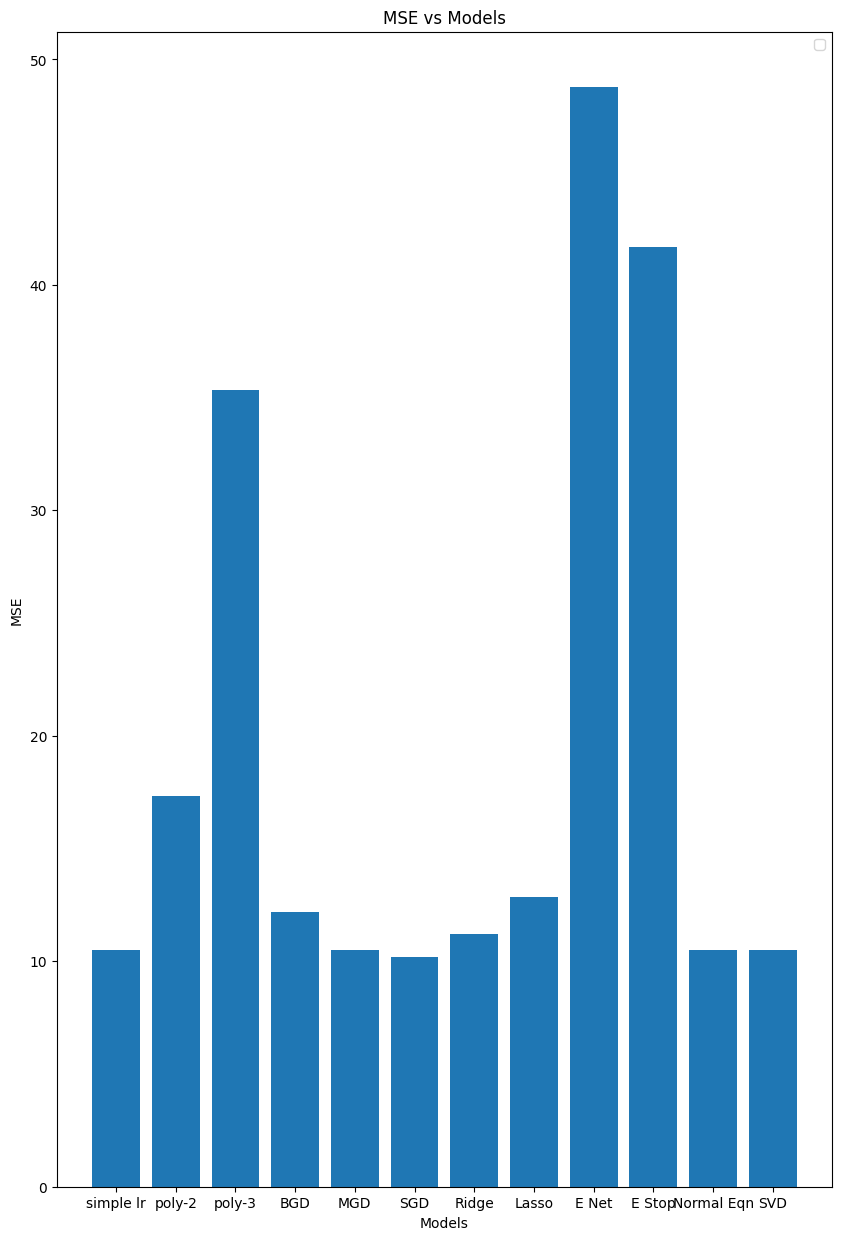

In [20]:
l=['simple lr','poly-2','poly-3','BGD','MGD','SGD','Ridge','Lasso','E Net','E Stop','Normal Eqn','SVD']
plt.figure(figsize=(10,15))
print(MSE_arr)
plt.bar(l,MSE_arr)
plt.xlabel("Models")
plt.ylabel("MSE")
plt.title("MSE vs Models")
plt.legend()
plt.show()


##MAE Vs MODELS

<ipython-input-21-d43ceae35546>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


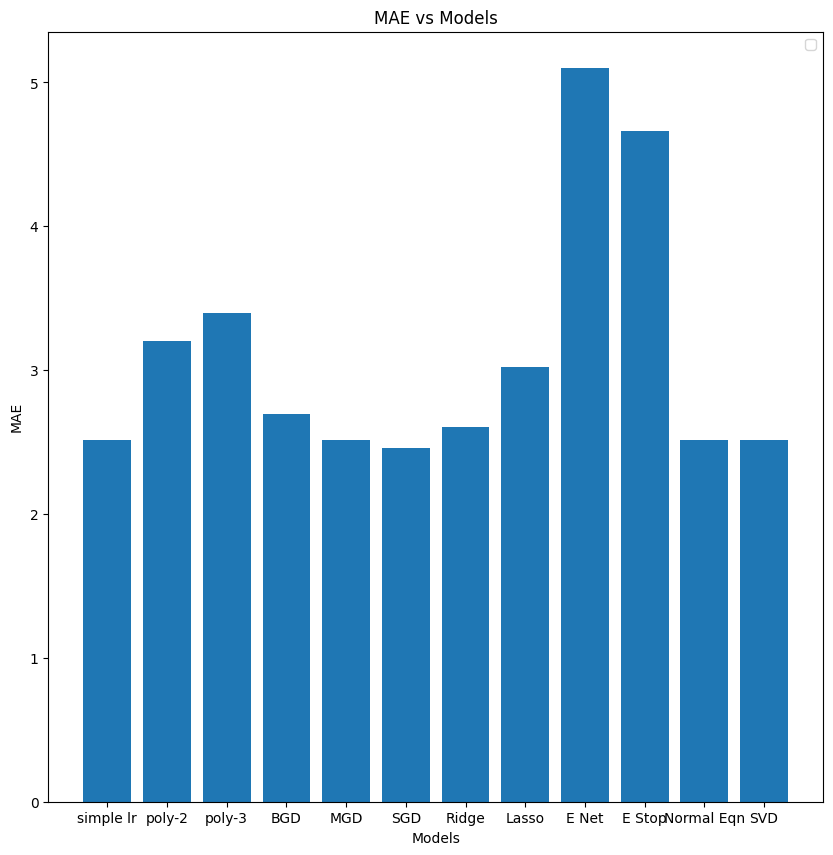

In [21]:
l=['simple lr','poly-2','poly-3','BGD','MGD','SGD','Ridge','Lasso','E Net','E Stop','Normal Eqn','SVD']
plt.figure(figsize=(10,10))
plt.bar(l,MAE_arr)
plt.xlabel("Models")
plt.ylabel("MAE")
plt.title("MAE vs Models")
plt.legend()
plt.show()

##R2 Vs MODELS

<ipython-input-22-a40bb6052846>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


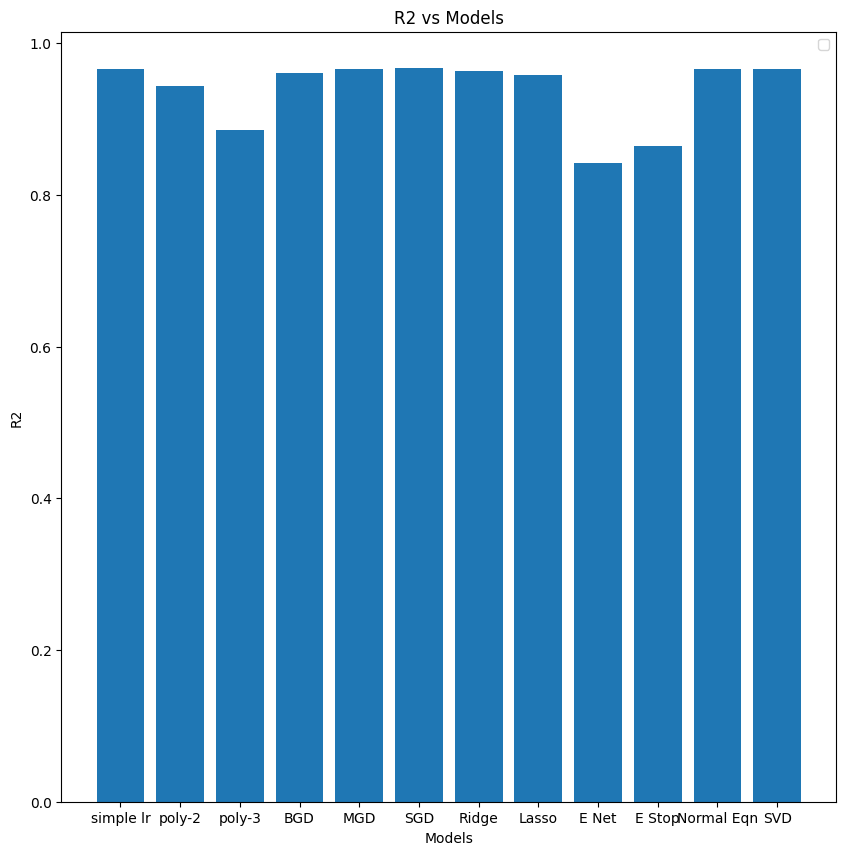

In [22]:
l=['simple lr','poly-2','poly-3','BGD','MGD','SGD','Ridge','Lasso','E Net','E Stop','Normal Eqn','SVD']
plt.figure(figsize=(10,10))
plt.bar(l,R2_arr)
plt.xlabel("Models")
plt.ylabel("R2")
plt.title("R2 vs Models")
plt.legend()
plt.show()



##TIME Vs MODELS

<ipython-input-23-f1c606289e92>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


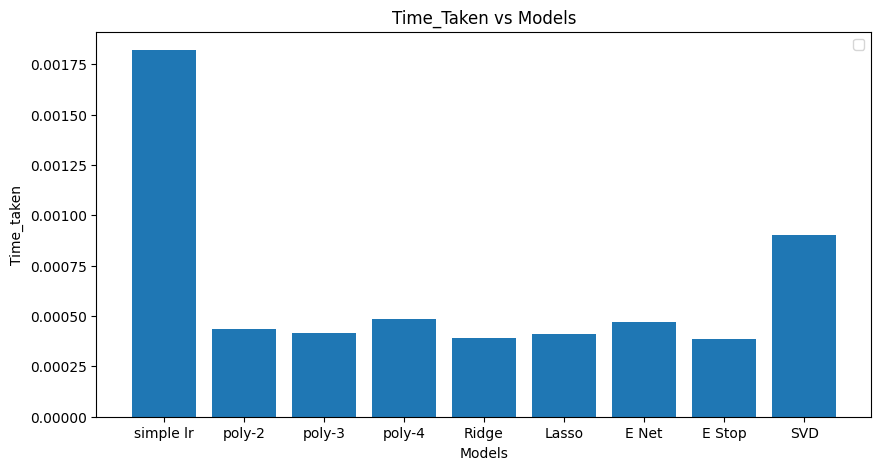

In [23]:
l=['simple lr','poly-2','poly-3','poly-4','Ridge','Lasso','E Net','E Stop','SVD']
plt.figure(figsize=(10,5))
plt.bar(l,time_taken_arr)
plt.xlabel("Models")
plt.ylabel("Time_taken")
plt.title("Time_Taken vs Models")
plt.legend()
plt.show()



## 10. Conclusion
Summarize the findings from the analysis, including which models performed best in terms of accuracy and computational efficiency.


#Analysis of Regression Project (with Computational Time):
This project applies several regression techniques to predict the Cost of Living Index using features like Rent Index, Groceries Index, and Local Purchasing Power Index. Each model is evaluated based on performance metrics and computational time.

#Key Findings:
##Simple Linear Regression:

Mean Absolute Error (MAE): 2.5164
Mean Squared Error (MSE): 10.5186
R² Score: 0.9659
Time: 0.0021 seconds
Conclusion: Quick and efficient, providing strong accuracy and generalization, making it the best balance of performance and time.
##Polynomial Regression:

###Degree 2:
MAE: 3.1997, MSE: 17.3432, R² Score: 0.9438
Time: 0.0007 seconds
Conclusion: A good performer but with higher error compared to simple linear regression.
###Degree 3:
MAE: 3.3994, MSE: 35.3519, R² Score: 0.8853
Time: 0.0005 seconds
Conclusion: Begins to overfit, leading to poorer performance compared to lower-degree models.
###Degree 4:
MAE: 52.6308, MSE: 21416.6755, R² Score: -68.4601
Time: 0.0006 seconds
Conclusion: Severely overfits, leading to poor performance and high errors.
Gradient Descent Methods:

##Batch Gradient Descent:
MAE: 2.7330, MSE: 12.5949, R² Score: 0.9592
Time: 1.0643 seconds
##Mini-Batch Gradient Descent:
MAE: 2.5155, MSE: 10.5142, R² Score: 0.9659
Time: 0.0543 seconds
##Stochastic Gradient Descent:
MAE: 3.2069, MSE: 18.5781, R² Score: 0.9397
Time: 1.8762 seconds
#Conclusion:
 Mini-batch gradient descent performed well but took longer to compute compared to simple linear regression with very minimal improvement in error metrics.
##Regularization Techniques:

###Ridge Regression:
MAE: 2.6077, MSE: 11.1958, R² Score: 0.9637
Time: 0.0005 seconds
###Lasso Regression:
MAE: 3.0206, MSE: 12.8347, R² Score: 0.9584
Time: 0.0005 seconds
###Elastic Net:
MAE: 48.7908, MSE: 5.0977, R² Score: 0.8418
Time: 0.0004 seconds
Conclusion: Ridge regression offers strong accuracy with low error and fast computation, making it a good alternative to simple linear regression.
###Normal Equation:

MAE: 2.5164, MSE: 10.5186, R² Score: 0.9659
Time: 0.0038 seconds
Conclusion: Performs similarly to linear regression but takes longer to compute.
##Singular Value Decomposition (SVD):

MAE: 2.5164, MSE: 10.5186, R² Score: 0.9659
Time: 0.0012 seconds
Conclusion: Similar to linear regression with slightly faster computation.
#Final Conclusion:
Simple Linear Regression is the best performer, offering high accuracy (R² = 0.9659), low errors (MSE = 10.5186, MAE = 2.5164), and the fastest computational time (0.0021 seconds). It is the most balanced and efficient model.\
Mini-Batch Gradient Descent performs similarly to linear regression but takes significantly longer to compute, making it less ideal in this case.\
Ridge Regression is a strong alternative with slightly higher errors but excellent computational efficiency, making it useful when regularization is needed.\
For practical applications, Simple Linear Regression is recommended due to its balance of performance, speed, and ease of use.